# <center>Techniques to Handle Vanishing Gradient Problem in Neural Network</center>

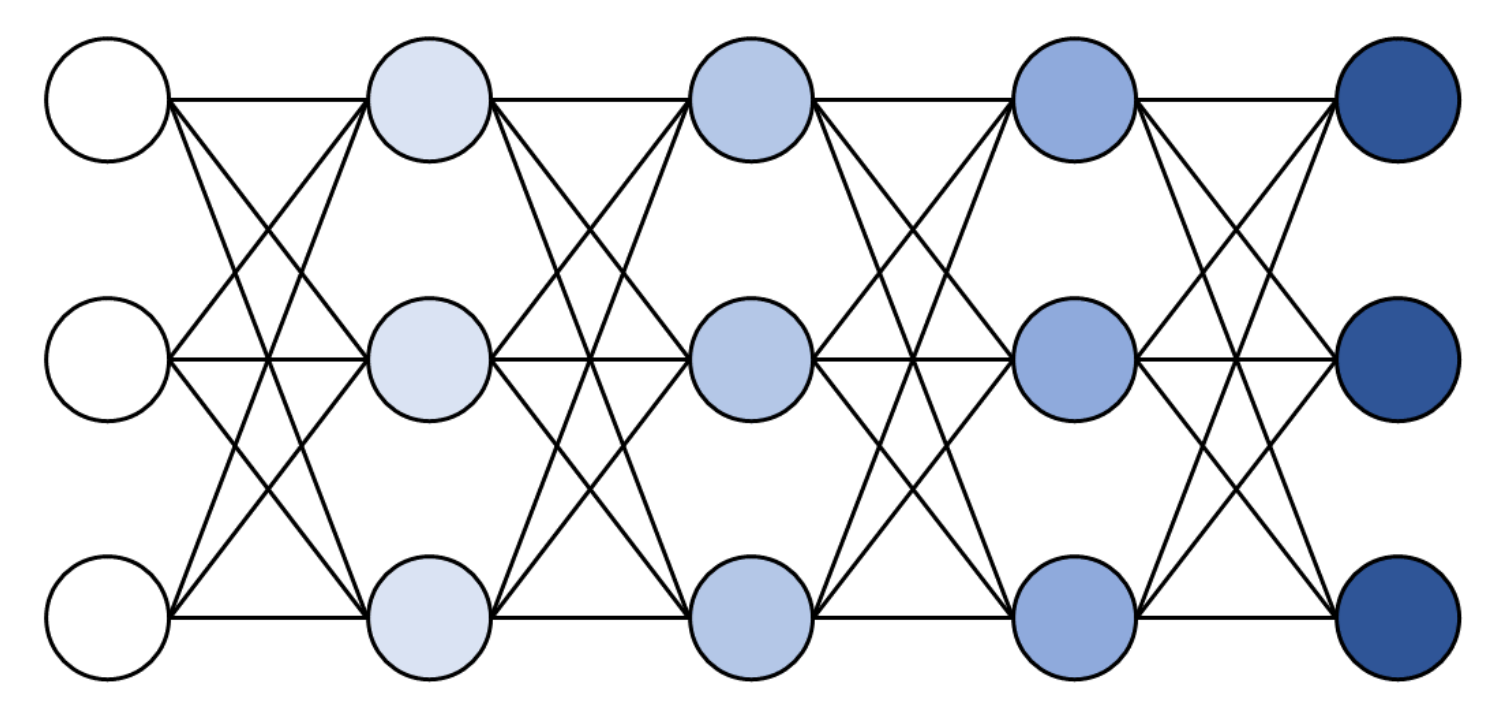

#### <center> Vanishing Gradient Problem is one of the biggest problem in Neural Network where no update in weight and biases takes place </center>

## Methods:
### <center> 1. Reduce Complexity</center>
### <center> 2. Change Activation Function</center>
### <center>3. Different weight initialization technique</center>
### <center>4. Batch Normalization</center>

# Architecture : Vanishing Gradient Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Import Dataset
X,y= make_moons(n_samples=250, noise=0.05,random_state=42)

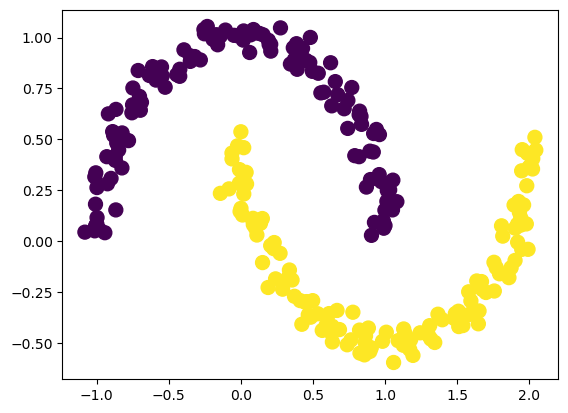

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

In [4]:
'''
Creating Architecture which will Definatly cause Vanishing Gradient Problem
'''

model=Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
'''
Compiling Architecture
'''
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
# Function to get all weights
# model.get_weights()

In [7]:
# Initial weight of 1st Layer
old_weight=model.get_weights()[0]

In [8]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
'''
Fitting Data into Architecture
'''
model.fit(X_train,y_train,epochs=100,verbose=0)

In [10]:
# Weight After training 
new_weight=model.get_weights()[0] 

In [11]:
old_weight

array([[-0.27434513, -0.60869336,  0.38882   ,  0.22348535,  0.46385115,
        -0.36319354, -0.4158026 ,  0.5520546 ,  0.43885356,  0.30870765],
       [ 0.18253583, -0.21121505,  0.27782142,  0.05836207, -0.5649744 ,
        -0.6428426 , -0.09125364,  0.10507935,  0.6350556 , -0.1298964 ]],
      dtype=float32)

In [12]:
new_weight

array([[-0.27370673, -0.60834324,  0.38836876,  0.2232633 ,  0.46350074,
        -0.3633291 , -0.4159041 ,  0.5520988 ,  0.43856218,  0.30873692],
       [ 0.18202066, -0.21153408,  0.2781962 ,  0.05854002, -0.5646713 ,
        -0.64273167, -0.09117926,  0.10504586,  0.6352937 , -0.12992106]],
      dtype=float32)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#002147;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px; color:white; text-align:center"><b>It is clearly seen that there is negligible change in weights</b></p>
</div>

### Percentage Change

In [13]:
# Get all configurations of created model
model.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [14]:
# Fetch learning rate
l_rate=model.optimizer.get_config()['learning_rate']
l_rate

0.001

#### We Know
$$W_n = W_o-\eta {\delta L\over \delta W_o}$$

#### Gradient
$$\therefore {\delta L\over \delta W_o} = {(W_o - W_n) \over \eta}  $$

In [15]:
gradient=(old_weight-new_weight)/l_rate

In [16]:
gradient

array([[-0.6383955 , -0.35011765,  0.45123693,  0.22205709,  0.35041568,
         0.13557076,  0.1015067 , -0.04422664,  0.2913773 , -0.02926588],
       [ 0.51516294,  0.31903383, -0.37476417, -0.17794965, -0.30314922,
        -0.11092424, -0.07437915,  0.03349036, -0.23812054,  0.02466142]],
      dtype=float32)

In [17]:
percent_change=abs(100*(old_weight-new_weight)/old_weight)

In [18]:
percent_change

array([[0.23269796, 0.05751955, 0.11605293, 0.09936092, 0.07554486,
        0.03732742, 0.02441224, 0.00801128, 0.06639511, 0.00948013],
       [0.28222567, 0.15104693, 0.13489392, 0.3049064 , 0.05365716,
        0.01725527, 0.08150814, 0.03187149, 0.03749602, 0.01898545]],
      dtype=float32)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#002147;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px; color:white; text-align:center"><b>There is negligible change in percentage</b></p>
</div>

# Solution 1: Reduce Complexity

##### <center> This method doesn't solve problem because in some datasets many layers are required </center>

In [19]:
model_1=Sequential()

model_1.add(Dense(10,activation='sigmoid',input_dim=2))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [20]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
old_weight=model_1.get_weights()[0]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [24]:
new_weight=model_1.get_weights()[0] 

In [25]:
l_rate=model_1.optimizer.get_config()['learning_rate']

In [26]:
gradient=(old_weight-new_weight)/l_rate

In [27]:
percent_change=abs(100*(old_weight-new_weight)/old_weight)

In [28]:
percent_change

array([[  178.75166 ,    23.82181 ,   398.0207  ,  2805.1414  ,
          200.98994 , 12953.783   ,   238.9119  ,  7176.942   ,
           57.673756,   164.66872 ],
       [  350.54398 ,    43.91742 ,   378.6426  ,   293.59683 ,
          205.71028 ,   271.36948 ,   441.2827  ,   286.40875 ,
          447.813   ,   243.18214 ]], dtype=float32)

# Solution 2: Change Activation Function

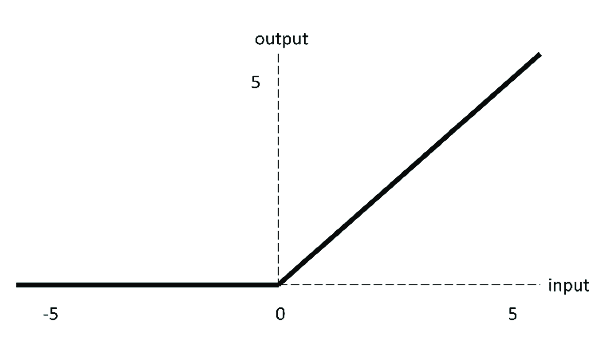

##### <center>Using Relu because it doesn't saturate output of node in positive region</center>

In [29]:
model_2=Sequential()

model_2.add(Dense(10,activation='relu',input_dim=2))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [30]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
old_weight=model_2.get_weights()[0]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [34]:
new_weight=model_2.get_weights()[0] 

In [35]:
l_rate=model_2.optimizer.get_config()['learning_rate']

In [36]:
gradient=(old_weight-new_weight)/l_rate

In [37]:
percent_change=abs(100*(old_weight-new_weight)/old_weight)

In [38]:
percent_change

array([[ 3.374544 , 48.445896 , 20.718874 , 17.385437 , 14.164204 ,
        17.819885 , 23.664225 ,  4.565936 , 32.597126 , 17.20569  ],
       [ 6.5056677, 43.26083  , 26.157936 ,  2.4037938,  9.121328 ,
         2.6862397, 33.146755 , 15.165245 , 75.57324  , 72.693924 ]],
      dtype=float32)

# Solution 3: Use different weight initialization technique

#### Formula for He Uniform Initialization
$$ limit =\sqrt {6\over F\_ in} $$
 ##### <center> Weight Initialization between [-limit,limit] </center>

##### <center>Correct weight initialization technique ensure correct value to find weighted sum node</center>

In [39]:
model_3=Sequential()
'''
Other Techiques can be implemented:
1. Gloront Normal
2. Gloront Uniform
3. He Normal
4. He Uniform
'''
model_3.add(Dense(10,activation='sigmoid',input_dim=2,kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(10,activation='sigmoid',kernel_initializer='he_uniform'))
model_3.add(Dense(1,activation='sigmoid',kernel_initializer='he_uniform'))

In [40]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
old_weight=model_3.get_weights()[0]

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
model_3.fit(X_train,y_train,epochs=100,verbose=0)

In [44]:
new_weight=model_3.get_weights()[0] 

In [45]:
l_rate=model_3.optimizer.get_config()['learning_rate']

In [46]:
gradient=(old_weight-new_weight)/l_rate

In [47]:
percent_change=abs(100*(old_weight-new_weight)/old_weight)

In [48]:
percent_change

array([[ 0.6100524 ,  0.8238609 ,  1.6857213 ,  0.39730725, 10.422578  ,
         3.6382976 ,  2.3697069 ,  0.6039081 ,  2.4554431 ,  2.3676715 ],
       [ 0.27308074,  4.638014  ,  3.4103777 ,  0.666163  , 12.456163  ,
         0.47706756,  0.03402005,  0.31052575,  0.9866743 ,  0.6905295 ]],
      dtype=float32)

# Solution 4: Batch Normalization

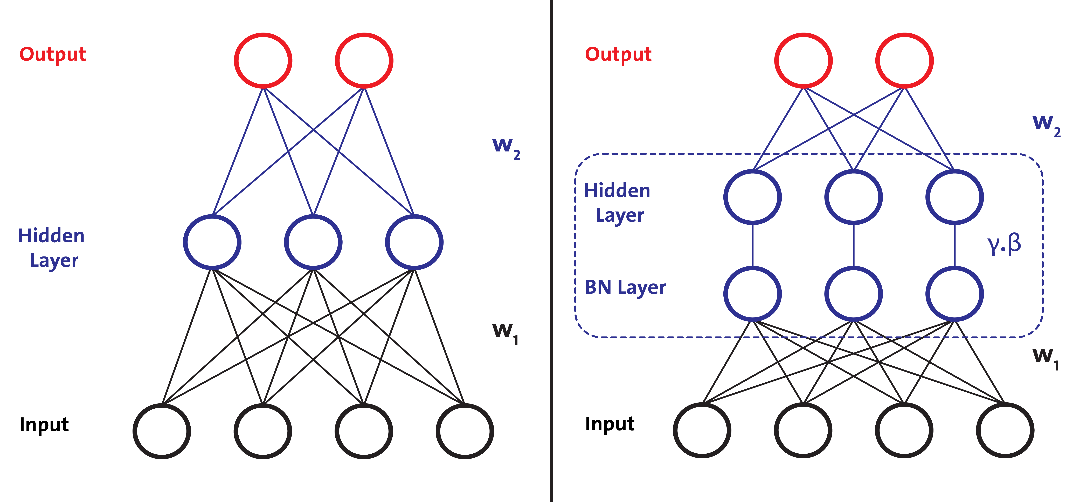

##### <center> Normalize output of each layer ensure a fine value to multiplied with weight of next layer</center>

In [49]:
from tensorflow.keras.layers import BatchNormalization

In [50]:
model_4=Sequential()

model_4.add(Dense(10,activation='sigmoid',input_dim=2))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(1,activation='sigmoid'))

In [51]:
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
old_weight=model_4.get_weights()[0]

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
model_4.fit(X_train,y_train,epochs=100,verbose=0)

In [55]:
new_weight=model_4.get_weights()[0] 

In [56]:
l_rate=model_4.optimizer.get_config()['learning_rate']

In [57]:
gradient=(old_weight-new_weight)/l_rate

In [58]:
percent_change=abs(100*(old_weight-new_weight)/old_weight)

In [59]:
percent_change

array([[1.12109632e+01, 1.56949215e+01, 3.62884974e+00, 6.87174678e-01,
        1.46231928e+01, 1.70767746e+01, 6.18421221e+00, 6.57043695e+00,
        8.00477684e-01, 5.91354132e-01],
       [1.50461435e+00, 3.27851224e+00, 8.02569580e+00, 1.20463858e+01,
        6.53489542e+00, 1.37506523e+01, 6.69964294e+02, 1.02831936e+00,
        1.60389543e+00, 2.57553959e+00]], dtype=float32)